In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
class Node:
    
    def __init__(self, state, parent, row, col):
        self.state = state
        self.parent = parent
        self.coordinates = (row, col)

In [7]:
class Solution:

    def __init__(self, grid, solution, explored, algorithm):
        self.grid = grid
        self.solution = solution
        self.explored = explored
        self.algorithm = algorithm
    
    def image(self):
        rows = len(self.grid)
        cols = len(self.grid[0]) if rows else 0

        # Create a numpy array to represent the maze
        maze_array = np.zeros((rows, cols))

        for i, row in enumerate(self.grid):
            for j, col in enumerate(row):
                if col == '#':  # Wall
                    maze_array[i, j] = 1
                elif col == 'S':  # Start
                    maze_array[i, j] = 2
                elif col == 'G':  # Goal
                    maze_array[i, j] = 5
                elif (i, j) in self.explored and (i, j) not in self.solution:
                    maze_array[i, j] = 4  # Explored space
                elif (i, j) in self.solution:
                    maze_array[i, j] = 3  # Solution path

        # Create a color map for the plot
        cmap = plt.cm.colors.ListedColormap(['white', 'black', 'blue', 'limegreen', 'yellow', 'red'])
        bounds = [0, 1, 2, 3, 4, 5, 6]
        norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

        # Plotting the maze
        fig, ax = plt.subplots(dpi=1000)
        ax.imshow(maze_array, interpolation='nearest', cmap=cmap, norm=norm)

        # Adding grid lines for visual separation of squares
        ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
        ax.set_yticks(np.arange(-.5, rows, 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)

        # Customize the title with a more game-like font
        plt.title(f"Maze Solver {self.algorithm}", fontsize=16, fontweight='bold', family='monospace')

        # Hide the tick marks
        plt.xticks([]), plt.yticks([])

In [8]:
class Maze:
    
    start = 'S'
    goal = 'G'
    
    def __init__(self, grid):
        self.grid = grid
        self.start_row, self.start_col = self.find_start_coordinates()
        self.start_node = Node('S', None, self.start_row, self.start_col)
        self.frontier = [self.start_node]
        self.node_grid = [[None for j in range(len(grid[0]))] for i in range(len(grid))]
        self.node_grid[self.start_row][self.start_col] = self.start_node
        self.explored = set()

    def find_start_coordinates(self):
        for i, row in enumerate(self.grid):
            for j, col in enumerate(row):
                if col == Maze.start:
                    return i, j
        raise ValueError('Start state not found in the grid.')
    
    def determine_neighbors(self, row, col):
        neighbors = []
        rows = len(self.grid)
        cols = len(self.grid[0]) if rows > 0 else 0

        # Check up, if not in the first row
        if row > 0 and self.grid[row - 1][col] != '#':
            node = Node(self.grid[row - 1][col], self.node_grid[row][col], row - 1, col)
            neighbors.append(node)
            self.node_grid[row - 1][col] = node

        # Check down, if not in the last row
        if row < rows - 1 and self.grid[row + 1][col] != '#':
            node = Node(self.grid[row + 1][col], self.node_grid[row][col], row + 1, col)
            neighbors.append(node)
            self.node_grid[row + 1][col] = node

        # Check left, if not in the first column
        if col > 0 and self.grid[row][col - 1] != '#':
            node = Node(self.grid[row][col - 1], self.node_grid[row][col], row, col - 1)
            neighbors.append(node)
            self.node_grid[row][col - 1] = node

        # Check right, if not in the last column
        if col < cols - 1 and self.grid[row][col + 1] != '#':
            node = Node(self.grid[row][col + 1], self.node_grid[row][col], row, col + 1)
            neighbors.append(node)
            self.node_grid[row][col + 1] = node

        return neighbors
        
    def BFS_solution(self):
        while True:
            try:
                explored_node = self.frontier.pop(0)
            except:
                raise Exception('Maze has no solution')
            
            self.explored.add(explored_node.coordinates)

            if explored_node.state == 'G':
                solution = [explored_node.coordinates]
                parent = explored_node.parent
                while parent.state != 'S':
                    solution.append(parent.coordinates)
                    parent = parent.parent
                solution.reverse()
                return Solution(self.grid, solution, self.explored, 'BFS')
            else:
                neighbors = self.determine_neighbors(explored_node.coordinates[0], explored_node.coordinates[1])
                newcomers = []
                for node in neighbors:
                    if node.coordinates not in self.explored:
                        newcomers.append(node)
                for node in newcomers:
                    self.frontier.append(node)
            raise Exception('Maze has no solution')  # If the frontier is empty and goal wasn't found


    def DFS_solution(self):
        while self.frontier:
            explored_node = self.frontier.pop()  # Last node is popped from the stack for DFS

            self.explored.add(explored_node.coordinates)

            if explored_node.state == 'G':
                # Found the goal, now reconstruct the path
                solution = [explored_node.coordinates]
                while explored_node.parent:
                    explored_node = explored_node.parent
                    solution.append(explored_node.coordinates)
                solution.reverse()  # The path is reconstructed from goal to start so we reverse it
                return Solution(self.grid, solution, self.explored, 'DFS')

            neighbors = self.determine_neighbors(explored_node.coordinates[0], explored_node.coordinates[1])
            for node in neighbors:
                if node.coordinates not in self.explored:
                    self.frontier.append(node)  # Add unexplored neighbors to the stack
        raise Exception('Maze has no solution')  # If the frontier is empty and goal wasn't found
    
    def DFS_solution(self):
        while self.frontier:
            explored_node = self.frontier.pop()  # Last node is popped from the stack for DFS

            self.explored.add(explored_node.coordinates)

            if explored_node.state == 'G':
                # Found the goal, now reconstruct the path
                solution = [explored_node.coordinates]
                while explored_node.parent:
                    explored_node = explored_node.parent
                    solution.append(explored_node.coordinates)
                solution.reverse()  # The path is reconstructed from goal to start so we reverse it
                return Solution(self.grid, solution, self.explored, 'DFS')

            neighbors = self.determine_neighbors(explored_node.coordinates[0], explored_node.coordinates[1])
            for node in neighbors:
                if node.coordinates not in self.explored:
                    self.frontier.append(node)  # Add unexplored neighbors to the stack

        raise Exception('Maze has no solution')  # If the frontier is empty and goal wasn't found


In [11]:
with open('maze.txt') as maze_file:
    grid = [list(line.replace('\n', '')) for line in maze_file.readlines()]
maze = Maze(grid)
maze.DFS_solution().image()

Exception: Maze has no solution

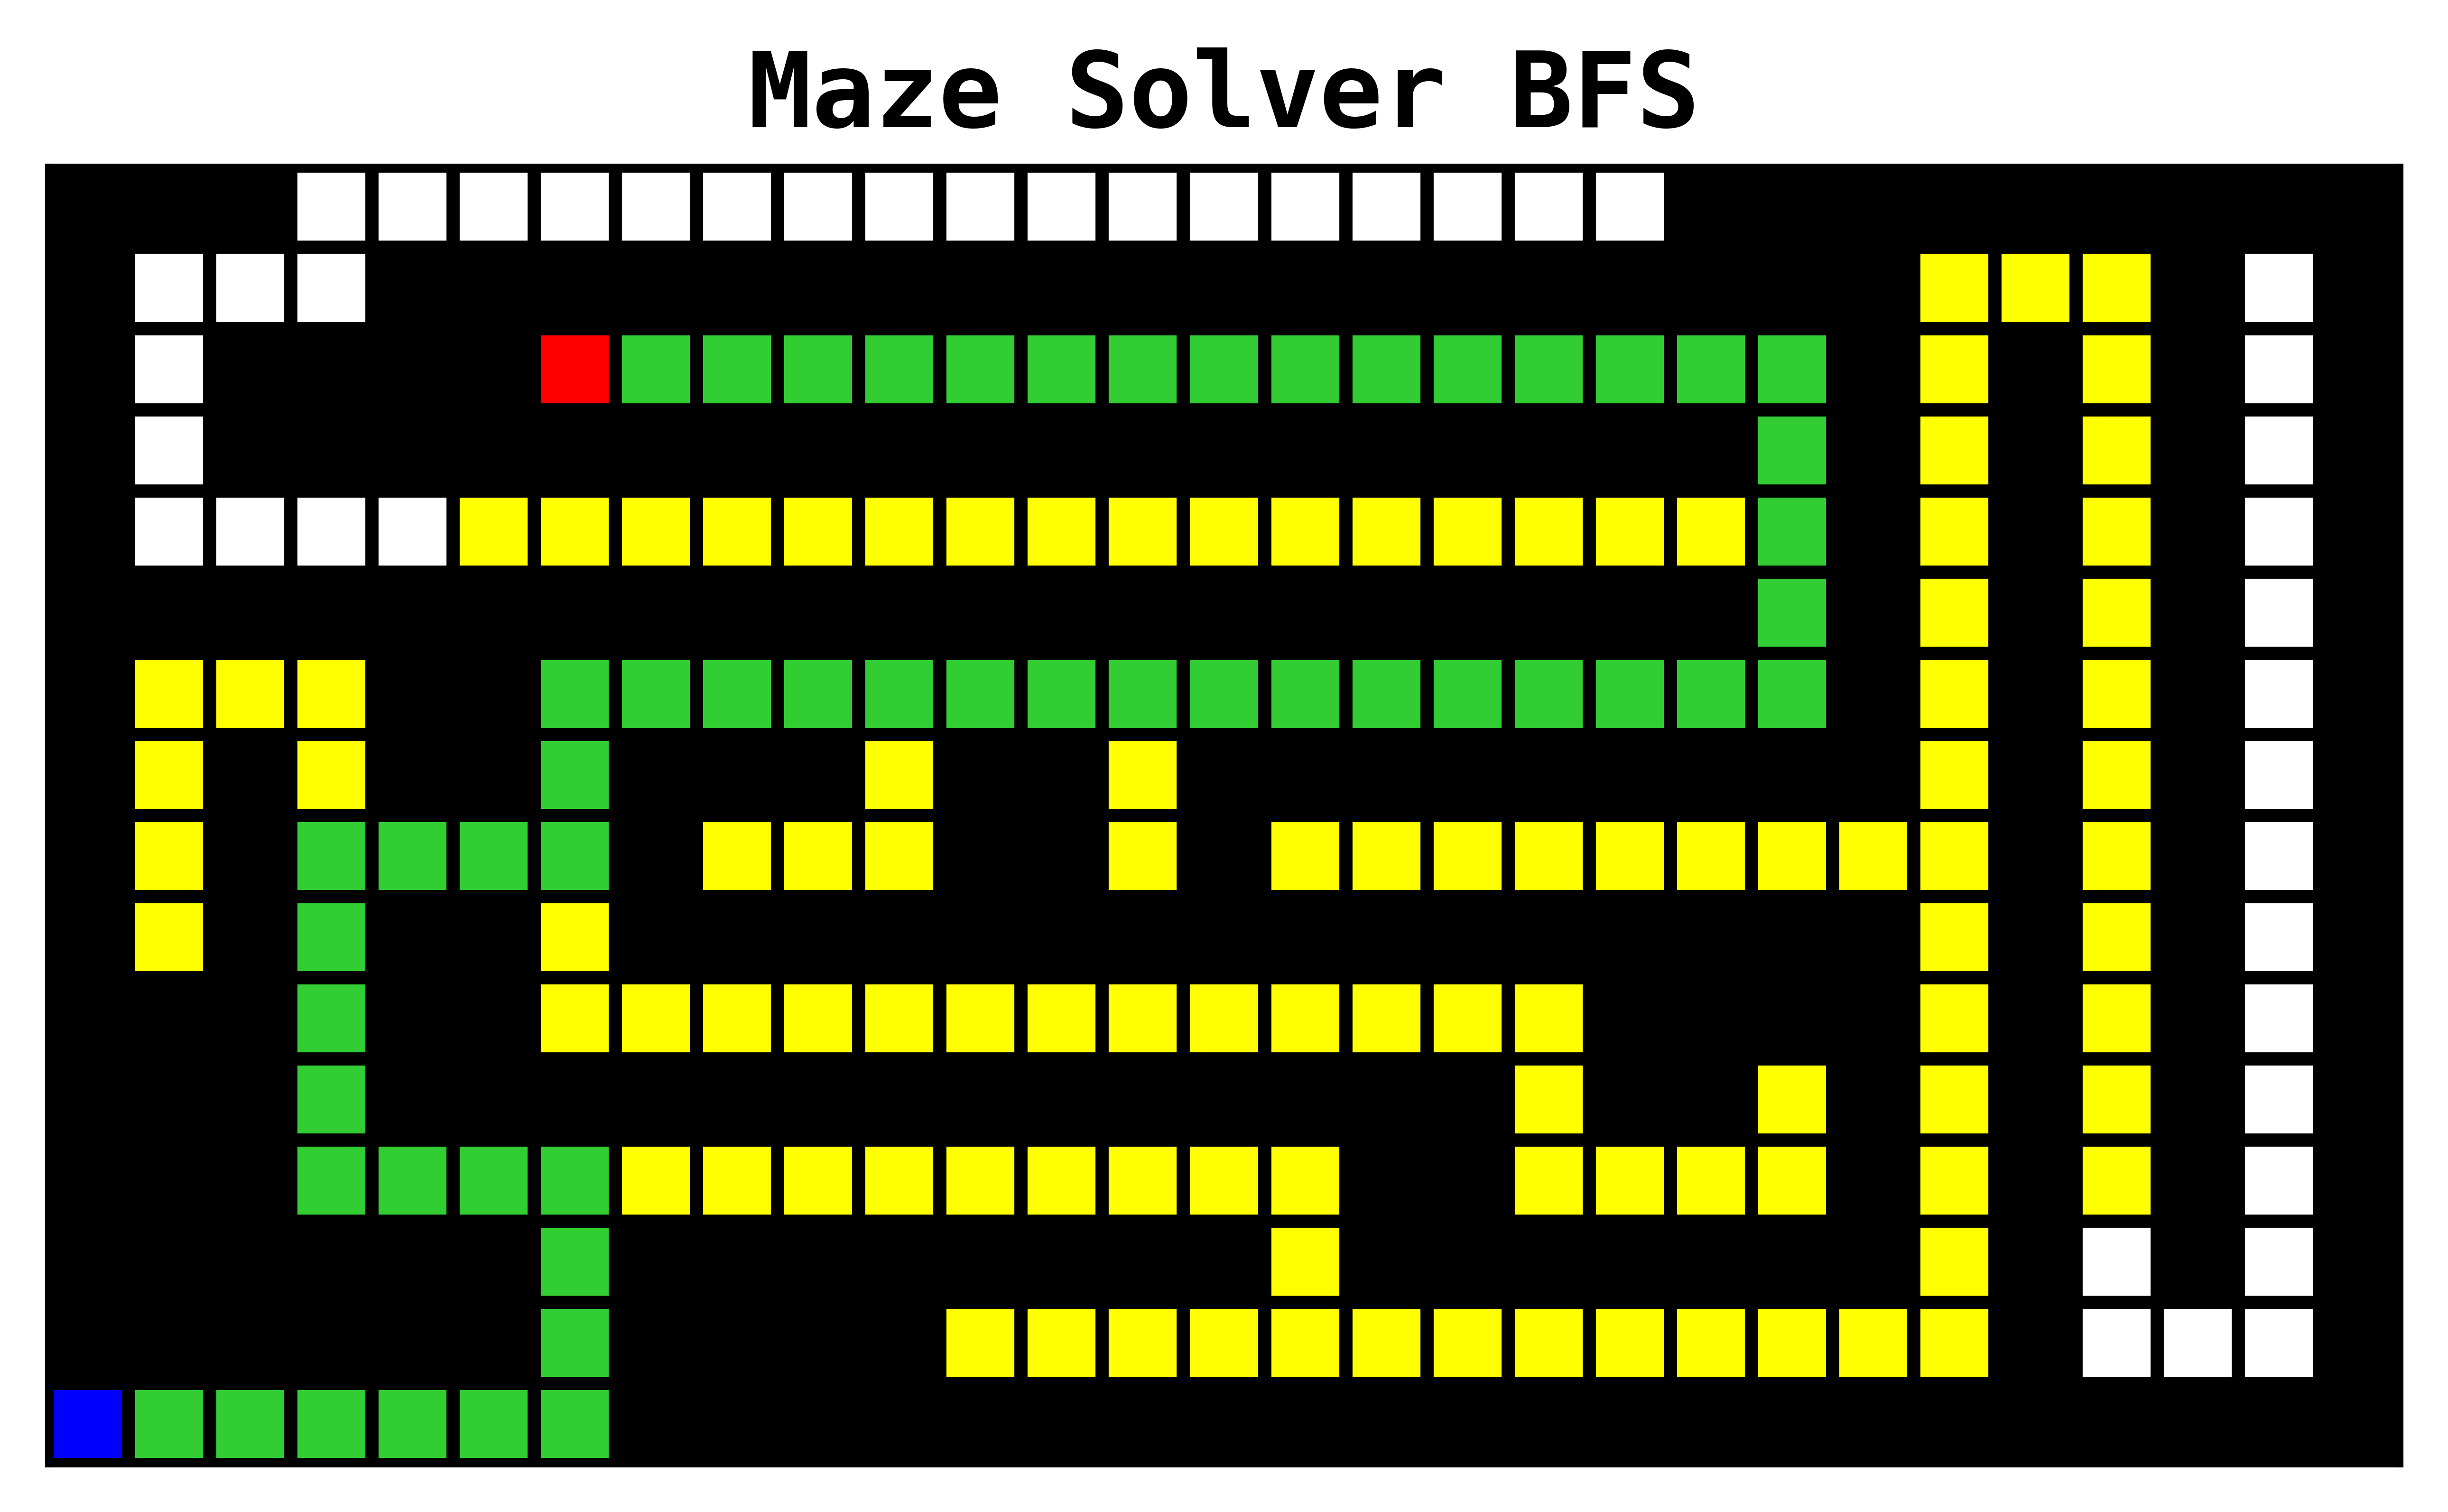

In [133]:
with open('maze2.txt') as maze_file:
    grid = [list(line.replace('\n', '')) for line in maze_file.readlines()]
maze = Maze(grid)
maze.BFS_solution().image()

In [130]:
BFS_solution